In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [40]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [41]:
dfc = pd.read_csv('data/candidate_result.csv')
dfc.head()

,seat,year,party,name,votes,votes_pc,winner
0,Dhaka-3,2008,BNP,Gayeshwar Chandra Roy,70680.0,36.71,no
1,Dhaka-6,1991,Independent,Sayed Sharafat Hossain,8.0,0.01,no
2,Dhaka-6,1991,Jatiya Janata Party (Asad),Md. Afzalul Huq Afzal,9.0,0.01,no
3,Comilla-3,2001,Independent,Md. Ainul Haque,12.0,0.01,no
4,Dhaka-5,1991,Jatiyatabadi Gonotantrik Chashi Dal,Afzaluddin Chowdhury,14.0,0.01,no


In [42]:
dfc.shape

(8747, 7)

In [43]:
# only take 4 elections data
dfc = dfc[dfc.year.isin(years)]
dfc.shape

(8183, 7)

In [44]:
# only take winners data
dfcwin = dfc[dfc.winner == 'yes']
dfcwin.head()

,seat,year,party,name,votes,votes_pc,winner
5411,Noakhali-3,1991,BNP,Salah Uddin Kamran,11378.0,22.23,yes
5749,Mymensingh-8,1991,JaPa,Khurram Khan Chowdhury,18209.0,24.68,yes
5805,Barguna-2,1991,Independent,Nurul Islam Moni,19616.0,28.41,yes
5860,Kurigram-3,1991,AL,Md. Amjad Hossain Talukdar,20547.0,23.74,yes
5896,Noakhali-1,1991,BNP,Zainul Abdin Farroque,21418.0,31.97,yes


In [45]:
dfcwin.shape

(1150, 7)

In [46]:
# only take candidates from BNP and AL
dfcwin = dfcwin[dfcwin.party.isin(mainp)]
dfcwin.head()

,seat,year,party,name,votes,votes_pc,winner
5411,Noakhali-3,1991,BNP,Salah Uddin Kamran,11378.0,22.23,yes
5860,Kurigram-3,1991,AL,Md. Amjad Hossain Talukdar,20547.0,23.74,yes
5896,Noakhali-1,1991,BNP,Zainul Abdin Farroque,21418.0,31.97,yes
5927,Barisal-4,1991,AL,Mohiuddin Ahmed,22093.0,30.22,yes
5961,Sylhet-4,1991,AL,Imran Ahmad,23018.0,42.76,yes


In [47]:
dfcwin.shape

(962, 7)

In [48]:
dfcwin = dfcwin[['seat', 'year', 'party', 'votes_pc']].sort_values(by=['votes_pc'], ascending=False)
dfcwin.to_csv('dataout/mainp_votepc_distn.csv', index=False)

In [49]:
dfcwin.head(10)

,seat,year,party,votes_pc
8566,Gopalganj-3,2008,AL,97.14
8638,Gopalganj-2,2008,AL,96.06
8550,Gopalganj-3,2001,AL,94.74
8637,Gopalganj-2,2001,AL,94.05
8130,Gopalganj-3,1996,AL,92.18
8270,Cox's Bazar-3,2001,BNP,91.91
8633,Gopalganj-1,2008,AL,91.60
8323,Gopalganj-1,1996,AL,86.90
8281,Gopalganj-2,1996,AL,86.31
8629,Madaripur-2,2008,AL,83.29


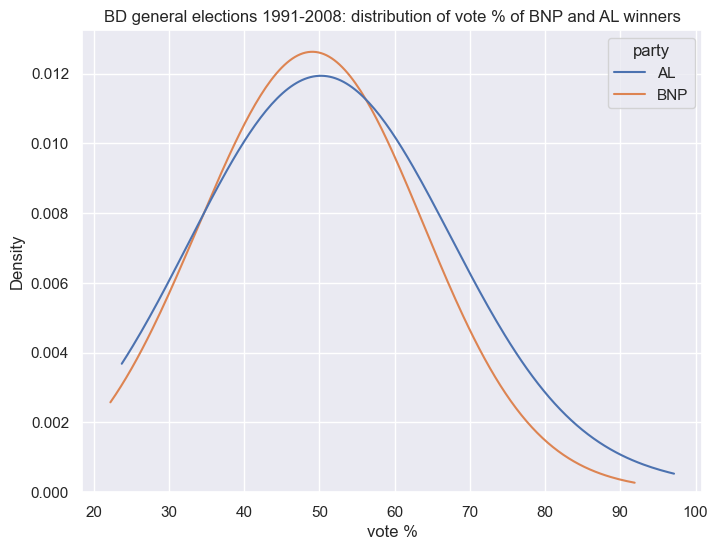

In [51]:
# plot kernel density to visualize the distribution of vote % of AL and BNP winning candidates
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=dfcwin, x="votes_pc", hue="party", bw_adjust=4, cut=0, ax=ax)
ax.set_title('BD general elections 1991-2008: distribution of vote % of BNP and AL winners')
ax.set_xlabel('vote %')
fig.savefig('fig/mainp_votepc_distn',bbox_inches='tight')

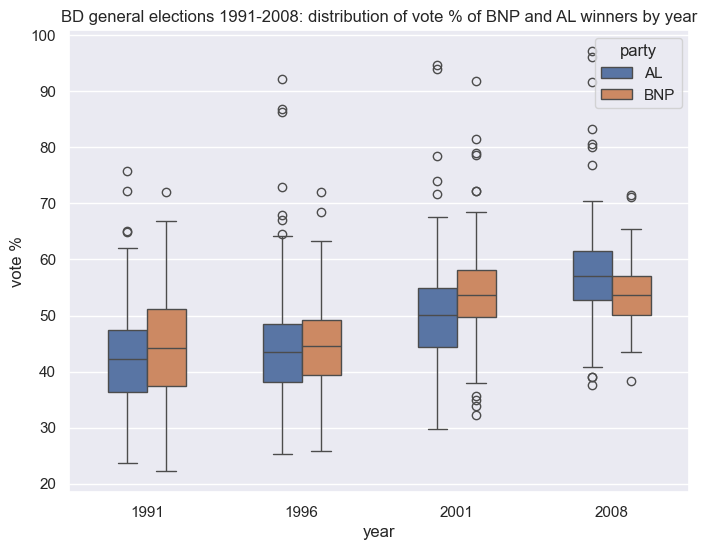

In [53]:
# plot distribution of vote % of AL and BNP winning candidates each year
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dfcwin, x="year", y="votes_pc", hue="party", width=.5, ax=ax)
ax.set_title('BD general elections 1991-2008: distribution of vote % of BNP and AL winners by year')
ax.set_ylabel('vote %')
fig.savefig('fig/mainp_votepc_year_distn',bbox_inches='tight')
